In [24]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import os


In [12]:
travel_data = pd.read_csv("travel_insurance_vlad.csv",delimiter = ',')

In [13]:
travel_data.head() 

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


Clustering is huge subject and part of unsupervised machine learning. From my experience i have use K - mean clustering 
but there are other clustering algorithms out there. The idea is to identify a pattern of customers and approach them in 
order to get more sales or focus your marketing activities in this types of customers. 
Other more simple idea is to give a certain type of scoring to all customers. The score can be based on some factors like (Age,Duration,Gender,Net Sales or Commision) 

In [16]:
print(travel_data['Gender'].value_counts())
print(travel_data.isnull().any())
print(travel_data['Gender'].isnull().sum())

M    9347
F    8872
Name: Gender, dtype: int64
Agency                  False
Agency Type             False
Distribution Channel    False
Product Name            False
Claim                   False
Duration                False
Destination             False
Net Sales               False
Commision (in value)    False
Gender                   True
Age                     False
dtype: bool
45107


In [18]:
travel_data = travel_data.dropna()
print(travel_data.isnull().any())

Agency                  False
Agency Type             False
Distribution Channel    False
Product Name            False
Claim                   False
Duration                False
Destination             False
Net Sales               False
Commision (in value)    False
Gender                  False
Age                     False
dtype: bool


take only two features for the k means: age and Net Sales


In [33]:
X=travel_data.iloc[:,[10,7]].values

time to import the k means and decide on number of clusters. 

In [34]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)



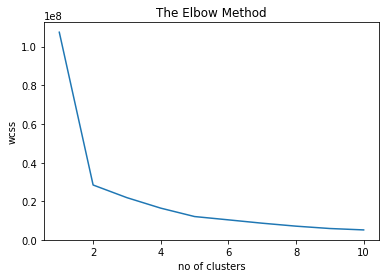

In [35]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

The elbow method gives me possibility to take 2 clusters only. 

In [43]:
kmeansmodel = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

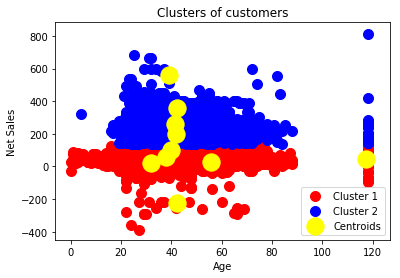

In [44]:
#Visualizing the 2 clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Net Sales')
plt.legend()
plt.show()

We can split this further by male and female. Which might give us much clear picture of the clusters. 
Duration can be also maybe intresting to explore with net sales. 

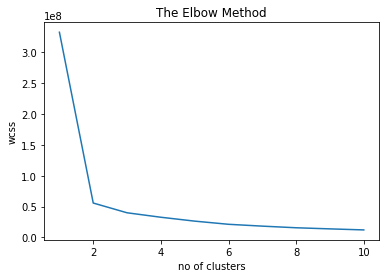

In [55]:
Y=travel_data.iloc[:,[5,7]].values
wcssy=[]

for i in range(1,11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
    kmeans.fit(Y)
    wcssy.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcssy)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()


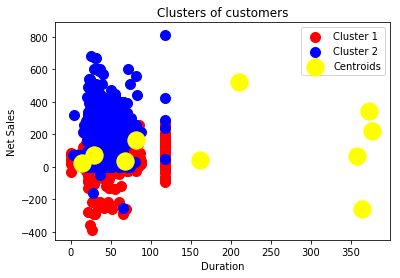

In [47]:
kmeansmodely = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeansy= kmeansmodely.fit_predict(Y)
plt.scatter(X[y_kmeansy == 0, 0], X[y_kmeansy == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeansy == 1, 0], X[y_kmeansy == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Duration')
plt.ylabel('Net Sales')
plt.legend()
plt.show()

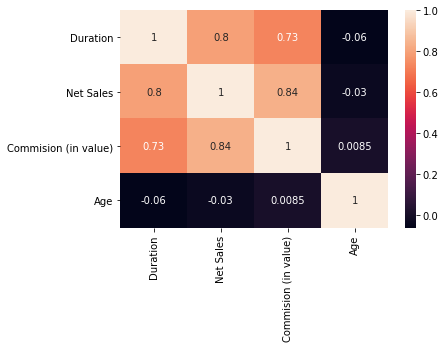

In [48]:
#just now come to my mind we can do the heat map of correlation between the columns 
sns.heatmap(travel_data.corr(), annot=True)

In [49]:
# from my perspective Duration and age seems to have a correlation. (inverse)

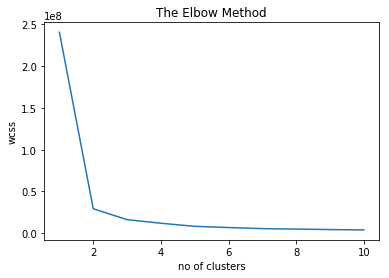

In [56]:
Z=travel_data.iloc[:,[10,5]].values
wcssz=[]

for i in range(1,11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
    kmeans.fit(Z)
    wcssz.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcssz)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

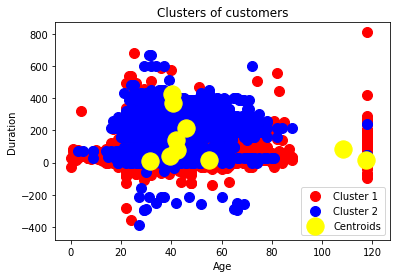

In [57]:
kmeansmodelz = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeansz= kmeansmodelz.fit_predict(Z)
plt.scatter(X[y_kmeansz == 0, 0], X[y_kmeansz == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeansz == 1, 0], X[y_kmeansz == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.legend()
plt.show()